In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [77]:
df = pd.read_csv('./train.csv')

In [78]:
df.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [80]:
print('Data nan')
for label in df.columns[0:]:
    print(f'{label} : {df[label].isnull().sum()}')

Data nan
x : 0
y : 1


In [81]:
#Delete Row Data Nan
for i in range(df['y'].size):
    if(np.isnan(df.at[i,'y'])):
       df = df.drop(df.index[i])

In [82]:
x_train = np.array(df['x']).reshape(len(df['x']),-1)
y_train = np.array(df['y']).reshape(-1,1)

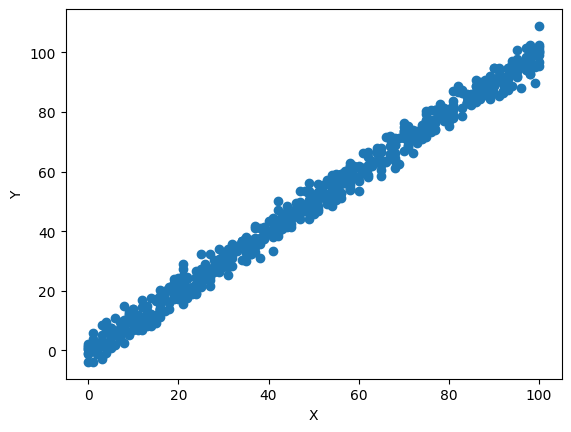

In [83]:
plt.scatter(x_train,y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## The data is quite linear


### What is Linear Regression?
Linear regression relies on dependent variables to predict a number
### Terminology
x: input or feature<br>
$\hat{y}$: output or target<br>
m: number of training samples<br>
n: characteristic number<br>
$(x^i,y^i)$: training example<br>
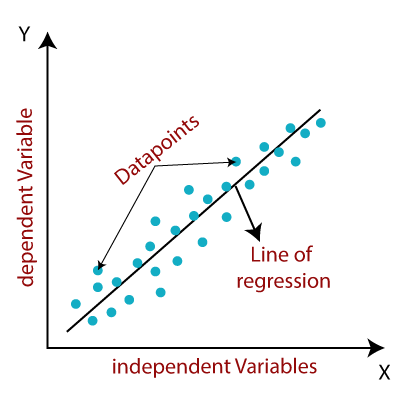
### Funtion Linear Regression
$\hat{y}$ = $f(x)$ = $w^T$x + b = $\vec{w}\vec{x}$ + b


In [84]:
def linear(w,b,x):
    return np.dot(w,x) + b

## Loss Funtion
J(x) = $\frac{2}{m}$$\sum\limits_{i=1}^m (\hat{y^i} - y^i)^2$<br>
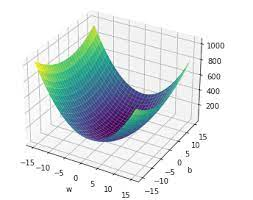
### Want
J(x) $\approx 0$
### Problem abou overfit
Overfitting occurs when the model is too complex to simulate the training data. This particular thing happens when the amount of training data is too small while the model complexity is too high.<br>
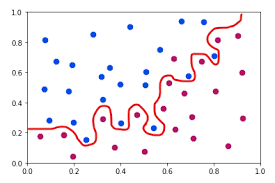
## Solution
<ol>
    <li>Validation</li>
    <li>Cross-validation</li>
    <li>
        Regularization<br>
        <p>We add to the loss function a lambda symbol with parameters to reduce the influence of less important parameters on the model output</p>
        => J(x) = $\frac{2}{m}($$\sum\limits_{i=1}^m (\hat{y^i} - y^i)^2$ + $\lambda\sum\limits_{i=1}^n (w_j^2)$)<br>
        <p>I omitted the regularization of parameter b because it is a free parameter</p>
        <p></p>
    </li>
</ol>

In [85]:
def loss_funtion(w,b,x,y,lambda_=0):
    loss = 0
    m, n = x.shape
    for i in range(m):
        loss += (linear(w,b,x[i]) - y[i])**2
    for j in range(n):
        loss += (lambda_ * w[j])**2
    return (2/m)*loss

In [86]:
x_train.shape

(699, 1)

In [87]:
w = np.linspace(10, -10, 30)
b = np.linspace(10, -10, 30)
loss = []
for i in range(w.size):
    loss.append(loss_funtion(np.array(w[i]).reshape(-1,1),b[i],x_train,y_train))

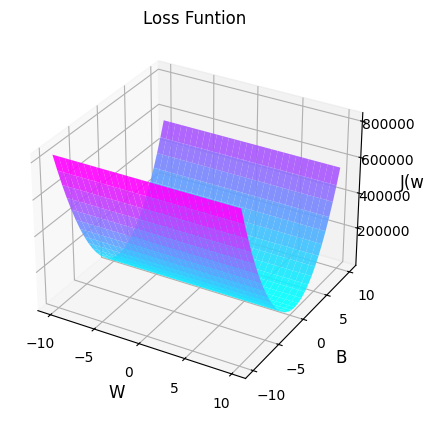

In [88]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(np.meshgrid(w,b)[0],np.meshgrid(w,b)[1], np.array(loss).reshape(-1,1), cmap='cool', alpha=0.9)
ax.set_title('Loss Funtion')
ax.set_xlabel('W', fontsize=12)
ax.set_ylabel('B', fontsize=12)
ax.set_zlabel('J(w)', fontsize=12)
plt.show()

### Gradient
Derivative of a function is the tangent on the graph at some point. Gradient is just the partial derivative<br>

$\Delta{J(x)} = \begin{cases} \Delta{w_j} = \frac{1}{m}\sum\limits_{i=1}^m(\hat{y^i} - y^i)x^i_j\\ \Delta{b} = \frac{1}{m}\sum\limits_{i=1}^m(\hat{y^i} - y^i)\end{cases}$<br>
### Gradien with overfit
$\Delta{J(x)} = \begin{cases} \Delta{w_j} = \frac{1}{m}(\sum\limits_{i=1}^m(\hat{y^i} - y^i)x^i_j + \lambda w_j)\\ \Delta{b} = \frac{1}{m}\sum\limits_{i=1}^m(\hat{y^i} - y^i)\end{cases}$

In [89]:
def gradient(w,b,x,y,lambda_ = 0):
    m, n = x.shape
    grd_w = np.zeros(n)
    grd_b = 0
    for i in range(m):
        e = (linear(w,b,x[i]) - y[i])
        for j in range(n):
            grd_w[j] += e*x[i,j]
            grd_b += e
    for j in range(n):
        grd_w[j] += lambda_*w[j]
    return [grd_w/n,grd_b/m]

### Gradient Descent
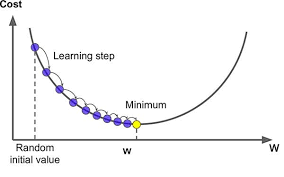<br>
Gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.
### Update Paramenter
$w_j = w_j - \alpha*\Delta{w_j}$<br>
$b = b - \alpha*\Delta{b}$

$\alpha: learning rate$<br>
We are moving step by step towards the  global minimum

In [90]:
def update_pramenter(w,b,x,y,lr,lambda_):
    n = x.shape[1]
    grd_w, grd_b = gradient(w,b,x,y,lambda_)
    for j in range(n):
        w[j] = w[j] - lr*grd_w[j]
    b = b - lr*grd_b
    return [w,b]

### Problem with learning rate
If big learning rate means that you roughly search for the best area in the space. Then, with a small learning you tune the weights to find the best value and you would use constant big learning rate you would "jump" around the minimum point. If you would use constant small learning rate it would take a lot of time to converge.<br><br><br> 
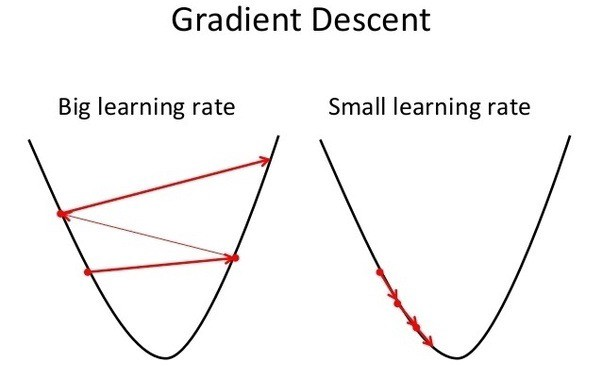<br><br>
So we tried to find the best learning rate in the first step by calculating on base 10

In [91]:
def _learning_rate(w,b,x,y,lr,lambda_):
    n = x.shape[1]
    grd_w, grd_b = gradient(w,b,x,y,lambda_)
    flag = True
    loss_0 = loss_funtion(w,b,x,y,lambda_)
    while(True):
        w1 = w.copy()
        b1 = 0
        w1, b1 = update_pramenter(w1,b1,x,y,lr,lambda_)
        loss_1 = loss_funtion(w1,b1,x,y,lambda_)
        if(loss_0 < loss_1):
            lr = lr /10
            flag = False
        elif(flag):
            lr = lr *10
        else:
            return lr

In [92]:
def linear_regression(x,y,learning_rate = 0.01,lambda_=0):
    m, n = x.shape
    w = np.zeros(n)
    b = 0
    loss = [loss_funtion(w,b,x,y)]
    learning_rate = _learning_rate(w,b,x,y,learning_rate,lambda_)
    for _ in range(500):
        w, b = update_pramenter(w,b,x,y,learning_rate,lambda_)
        loss_ = loss_funtion(w,b,x,y)
        if(loss[_] - loss_ <= 0.00001):
            break
        loss.append(loss_)
    return [w,b,loss]

In [93]:
w,b,loss = linear_regression(x_train,y_train)

/tmp/ipykernel_37438/629371142.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grd_w[j] += e*x[i,j]


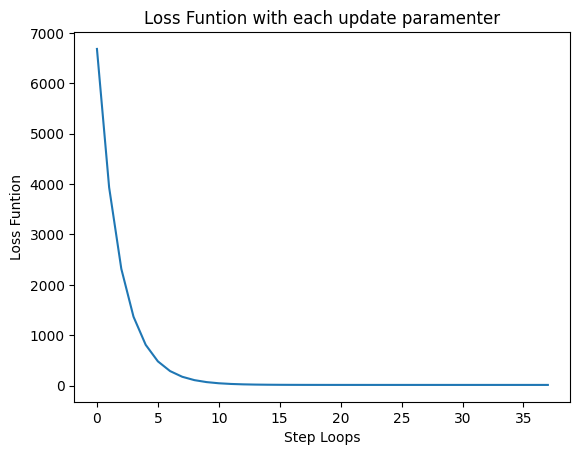

In [94]:
plt.plot(np.arange(len(loss)),loss)
plt.title('Loss Funtion with each update paramenter')
plt.xlabel('Step Loops')
plt.ylabel('Loss Funtion')
plt.show()

In [95]:
loss[len(loss)-1]

array([15.74129725])

In [96]:
y_pred = np.array([linear(w,b,x_train[i]) for i in range(y_train.size)]).reshape(-1,1)

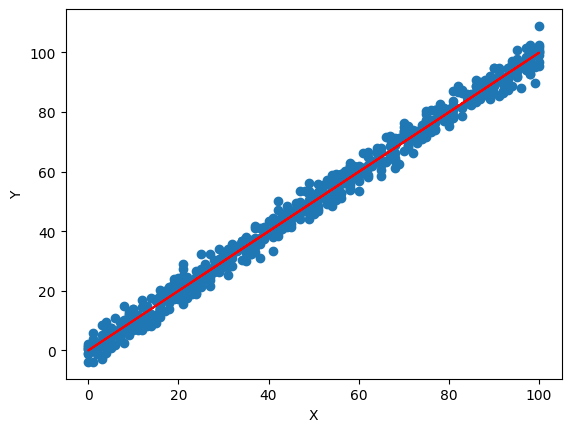

In [97]:
plt.scatter(x_train,y_train)
plt.plot(x_train,np.array(y_pred),color ='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [98]:
def gaussian(x,std,mean):
    b=[]
    a = 1/(std*np.sqrt(2*np.pi))
    for i in range(x.size):
        b.append(np.exp((-0.5 * (x[i] - mean)**2)/(std**2)))
    return np.array(b)*a

### Compare distribution density between actual and predicted:
All regression models operate on the assumption of a random distribution of the outcome variable; If the model is correct, its resulting distribution will be uniform and overlap with the actual distribution. of the quantity we want to estimate:

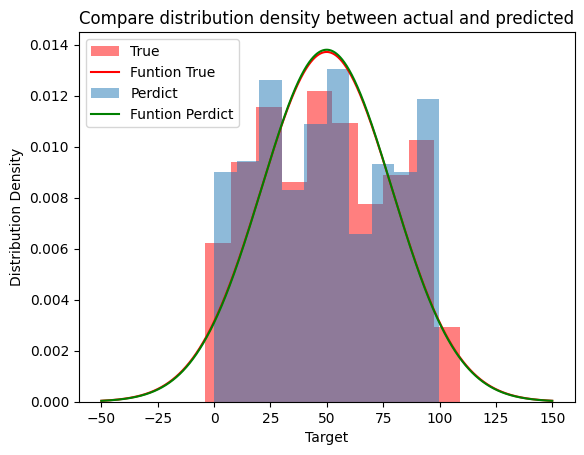

In [99]:
x_gaus = np.arange(-50,150,0.01)
plt.hist(y_train,color = 'red',density=True,alpha = 0.5,label = 'True')
plt.plot(x_gaus,gaussian(x_gaus,y_train.std(),y_train.mean()), color ='red', label = 'Funtion True')
plt.hist(y_pred,density=True,alpha = 0.5,label = 'Perdict')
plt.plot(x_gaus,gaussian(x_gaus,y_pred.std(),y_pred.mean()), color ='green', label ='Funtion Perdict')
plt.xlabel('Target')
plt.ylabel('Distribution Density')
plt.title('Compare distribution density between actual and predicted')
plt.legend()
plt.show()

Data overfit loss very small

## Criteria for testing regression models
### The criteria are based on absolute difference values
<ol>
    <li>
        MAE: Average of absolute differences<br><br>
        MAE = $\frac{\sum\limits_{i=1}^m({|\hat{y^i} - y^i|})}{m}$
    </li><br>
    <li>
        SAE: Total absolute difference <br><br>
        SAE = $\sum\limits_{i=1}^m({|\hat{y^i} - y^i|})$
    </li>
    ...
</ol>

### Criteria based on squared error

<ol>
    <li>
        MSE: mean squared error<br><br>
        MSE = $\frac{\sum\limits_{i=1}^m({\hat{y^i} - y^i})^2}{m}$
    </li><br>
    <li>
        SSE: sum of squared errors <br><br>
        SSE = $\sum\limits_{i=1}^m({\hat{y^i} - y^i})^2$
    </li><br>
    <li>
        RMSE: Square root of mean squared error <br><br>
        RMSE = $\sqrt{\frac{\sum\limits_{i=1}^m({\hat{y^i} - y^i})^2}{m}}$
    </li>
    ...
</ol>


#### Rsq: hệ số xác định : coefficient of determination (R2)
This coefficient does not provide information about the accuracy of the model but does indicate how much of the variance of the outcome variable in the sample the model explains. This information is quite important for the deductive mode<br>
$R^2 = 1 - \frac{\sum(y - \hat{y})^2}{\sum(y - \bar{y})^2}$

In [100]:
SAE = np.sum(np.array([np.absolute(y_pred[i] - y_train[i]) for i in range(y_train.size)]))
print(SAE)

1557.829638035303


In [101]:
MAE = SAE/y_train.size
print(MAE)

2.228654703913166


In [102]:
SSE = np.sum(np.array([(y_pred[i] - y_train[i])**2 for i in range(y_train.size)]))
print(SSE)

5501.580622521453


In [103]:
MSE = SSE/y_train.size
print(MSE)

7.870644667412665


In [104]:
RMSE = np.sqrt(MSE)
print(RMSE)

2.8054669250256126


In [105]:
SSR = np.sum(np.array([(y_train.mean() - y_train[i])**2 for i in range(y_train.size)]))

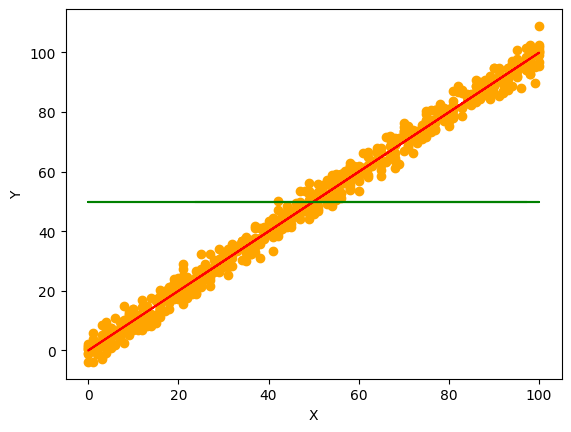

In [106]:
plt.scatter(x_train,y_train,color ='orange')
plt.plot(x_train,np.array(y_pred),color ='r')
plt.plot(x_train,np.repeat(y_train.mean(),y_train.size),color ='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [107]:
R_2 = 1 - SSE/SSR
print(R_2)

0.9906981140834804


## 2 Paramenter

In [108]:
df = pd.read_csv('./housePrice.csv',usecols = ['Area','Room','Price(USD)'])

In [109]:
df

,Area,Room,Price(USD)
0,63,1,61666.67
1,60,1,61666.67
2,79,2,18333.33
3,95,2,30083.33
4,123,2,233333.33
...,...,...,...
3474,86,2,116666.67
3475,83,2,226666.67
3476,75,2,12166.67
3477,105,2,186666.67


In [110]:
print('Data nan')
for label in df.columns[0:]:
    print(f'{label} : {df[label].isnull().sum()}')

Data nan
Area : 0
Room : 0
Price(USD) : 0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Price(USD)  3479 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 81.7+ KB


In [112]:
i=0
I =[]
for area in df['Area']:
    if(',' in area):
        I.append(i)
    i+=1

In [113]:
df = df.drop(df.index[I])

In [114]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,train_size = 80, random_state = 50)

In [115]:
x_train = np.array(df[df.columns[:-1]]).astype(float)
y_train = np.array(df[df.columns[-1]]).reshape(-1,1)

### Scaler Data
#### Why you need scale data
Given the use of small weights in the model and the use of error between predictions and expected values, the scale of inputs and outputs used to train the model are an important factor. Unscaled input variables can result in a slow or unstable learning process, whereas unscaled target variables on regression problems can result in exploding gradients causing the learning process to fail.

#### Solution
<ol>
    <li>
        Scaler: X_scaler = $\frac{X}{Xmax}$<br>
    </li><br>
    <li>
        Mean normalization: X_scaler = $\frac{X - \bar{X}}{Xmax - Xmin}$<br>
    </li><br>
    <li>
        Z-score: X_scaler = $\frac{X - \bar{X}}{\sigma}$<br>
        <br>
        $\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{m}\sum\limits_{i=1}^m(X - \bar{X})^2}$
    </li>
</ol>

In [116]:
def scale_data(x,scale_mode=None):
    n = x.shape[1]
    list_scaler = []
    match scale_mode:
        case 'maxScaler':
            for j in range(n):
                max_scaler = np.max(x[:,j])
                x[:,j] = x[:,j]/max_scaler
                list_scaler.append({'max':max_scaler})
        case 'minMaxScaler':
            for j in range(n):
                mean_x = x[:,j].mean()
                max_x = np.max(x[:,j])
                min_x = np.min(x[:,j])
                x[:,j] = (x[:,j] - mean_x)/(max_x - min_x)
                list_scaler.append({'max':max_x,'min':min_x,'mean':mean_x})
        case _:
            '''z-score: ScalerStanderd'''
            for j in range(n):
                mean_x = x[:,j].mean()
                std_x = x[:,j].std()
                x[:,j] = (x[:,j] - mean_x)/std_x
    return x,list_scaler

In [117]:
x_train,coef_scaler = scale_data(x_train,scale_mode = 'minMaxScaler')

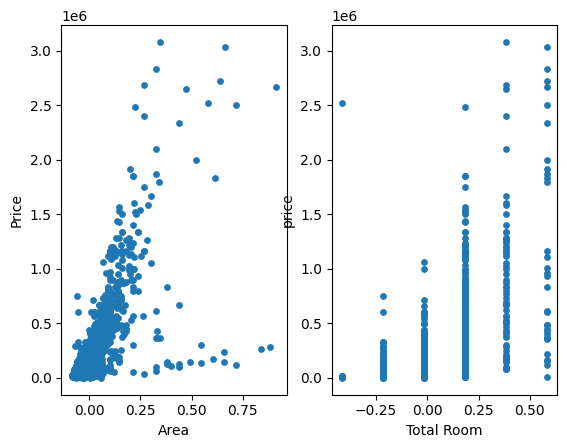

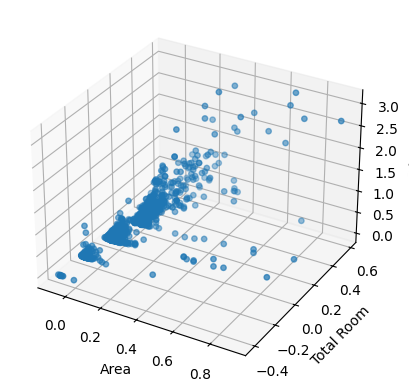

In [118]:
plt.subplot(1,2,1)
plt.scatter(x_train[:,-0],y_train,s=15)
plt.xlabel('Area')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.scatter(x_train[:,-1],y_train,s=15)
plt.xlabel('Total Room')
plt.ylabel('price')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_train[:,0],x_train[:,1],y_train,s=15)
ax.set_xlabel('Area')
ax.set_ylabel('Total Room')
ax.set_zlabel('Price')
plt.show()

In [119]:
w,b,loss = linear_regression(x_train,y_train)

/tmp/ipykernel_37438/629371142.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grd_w[j] += e*x[i,j]


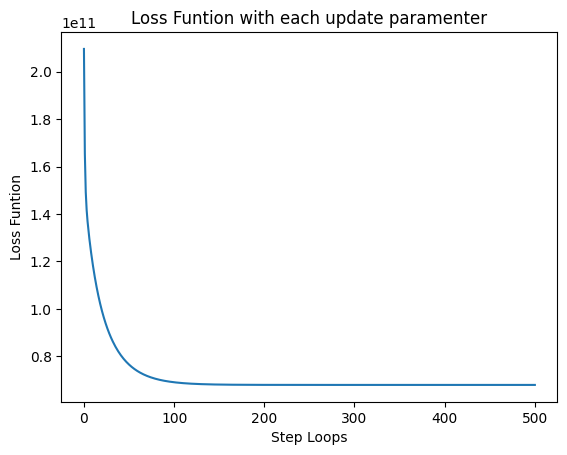

In [120]:
plt.plot(np.arange(len(loss)),loss)
plt.title('Loss Funtion with each update paramenter')
plt.xlabel('Step Loops')
plt.ylabel('Loss Funtion')
plt.show()

In [121]:
x_area = np.linspace(-0.2,1,1000).reshape(-1,1)
x_rooms = np.linspace(-0.6,0.8,1000).reshape(-1,1)
x_ = np.hstack([x_area,x_rooms])
x_area, x_rooms = np.meshgrid(x_area,x_rooms)
y_ = np.array([linear(w,b,x_[i]) for i in range(1000)]).reshape(-1,1)
y_pred = np.array([linear(w,b,x_train[i]) for i in range(y_train.size)]).reshape(-1,1)
y_0 = np.array([linear(w[0],b,x_train[:,0])]).reshape(-1,1)
y_1 = np.array([linear(w[1],b,x_train[:,1])]).reshape(-1,1)

In [122]:
y_.shape

(1000, 1)

In [123]:
y_train.shape

(3473, 1)

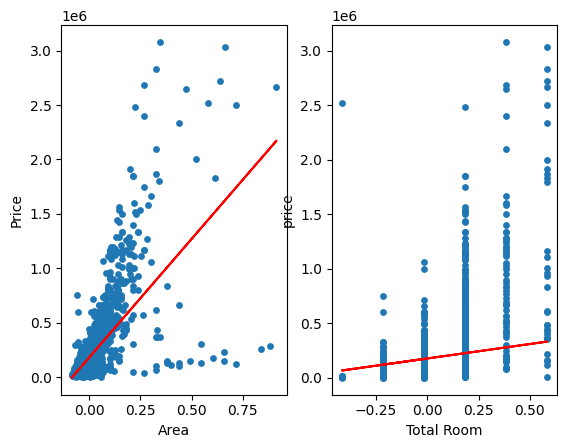

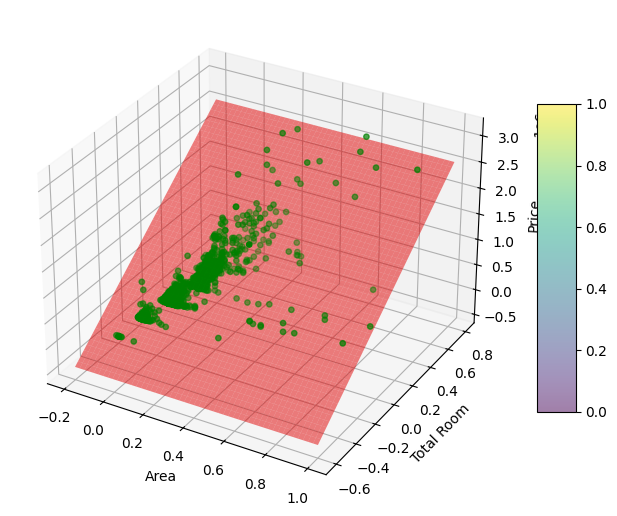

In [124]:
plt.subplot(1,2,1)
plt.scatter(x_train[:,-0],y_train,s=15)
plt.plot(x_train[:,0],y_0,color ='r')
plt.xlabel('Area')
plt.ylabel('Price')
plt.subplot(1,2,2)
plt.scatter(x_train[:,-1],y_train,s=15)
plt.plot(x_train[:,1],y_1,color ='r')
plt.xlabel('Total Room')
plt.ylabel('price')
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0],x_train[:,1],y_train,s=15,color ='green')
surf  = ax.plot_surface(x_area,x_rooms, y_, color = 'red', alpha=0.5)
fig.colorbar(surf, shrink=0.5, aspect=8)
ax.set_xlabel('Age')
ax.set_ylabel('Total Room')
ax.set_zlabel('Price')
plt.show()

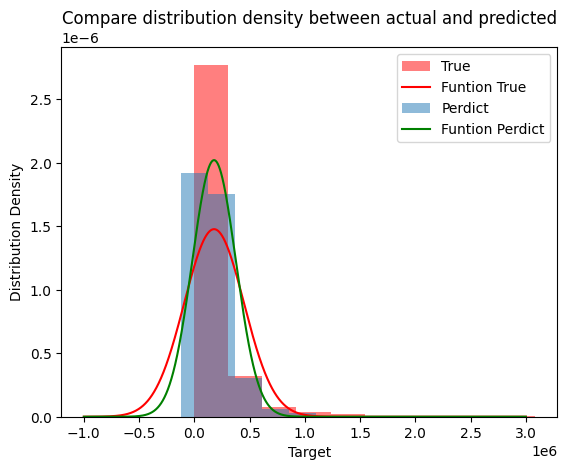

In [125]:
x_gaus = np.arange(-1000000,3000000,10)
plt.hist(y_train,color = 'red',density=True,alpha = 0.5,label = 'True')
plt.plot(x_gaus,gaussian(x_gaus,y_train.std(),y_train.mean()), color ='red', label = 'Funtion True')
plt.hist(y_pred,density=True,alpha = 0.5,label = 'Perdict')
plt.plot(x_gaus,gaussian(x_gaus,y_pred.std(),y_pred.mean()),color ='green', label ='Funtion Perdict')
plt.xlabel('Target')
plt.ylabel('Distribution Density')
plt.title('Compare distribution density between actual and predicted')
plt.legend()
plt.show()

In [126]:
SSE = np.sum(np.array([(y_pred[i] - y_train[i])**2 for i in range(y_train.size)]))
print(SSE)

117991163325167.86


In [127]:
SSR = np.sum(np.array([(y_train.mean() - y_train[i])**2 for i in range(y_train.size)]))

In [128]:
R_2 = 1 - SSE/SSR
print(R_2)

0.5342989231290196


# Linear Regression with scikit-learn

In [58]:
from sklearn.linear_model import LinearRegression